# 搜集個股特徵
#### X: 今日收盤價、開盤價、最高價、最低價、殖利率、本益比、成交股數、成交金額、漲跌價差、成交筆數... (可以自行再加入其他相關技術指標)
#### y: 明日收盤價

In [1]:
import requests
import json
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.family']='SimHei' # 顯示中文('SimHei' for MacOS)

### 月交易資訊（以台積電為例）
#### 每日收盤價、開盤價、最高價、最低價、成交股數、成交金額、漲跌價差、成交筆數

In [2]:
data = {
    'response':'json',
    'date':'20171101',
    'stockNo':'2330',
}
res = requests.get('http://www.twse.com.tw/exchangeReport/STOCK_DAY', params=data)
print(res.text)

{"stat":"OK","date":"20171101","title":"106年11月 2330 台積電           各日成交資訊","fields":["日期","成交股數","成交金額","開盤價","最高價","最低價","收盤價","漲跌價差","成交筆數"],"data":[["106/11/01","20,465,054","4,975,624,502","243.50","245.00","241.50","242.50","-0.50","6,464"],["106/11/02","16,309,342","3,940,181,714","242.00","242.50","240.50","241.00","-1.50","5,912"],["106/11/03","18,327,682","4,386,122,470","240.50","241.00","238.50","239.00","-2.00","5,621"],["106/11/06","21,029,515","5,063,670,900","243.50","244.00","239.00","239.50","+0.50","6,601"],["106/11/07","21,689,261","5,266,500,464","242.00","244.00","241.50","244.00","+4.50","6,729"],["106/11/08","14,579,103","3,536,455,029","243.00","243.50","242.00","242.50","-1.50","4,610"],["106/11/09","21,366,949","5,151,628,572","240.50","243.00","240.00","241.00","-1.50","6,339"],["106/11/10","15,061,296","3,629,826,936","240.00","242.00","239.50","240.50","-0.50","4,465"],["106/11/13","12,087,858","2,904,559,294","240.00","241.50","239.50","239.50","-1.00","4,

In [3]:
result = json.loads(res.text)
df1 = pd.DataFrame(result['data'])
df1.columns = result['fields']
df1

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,106/11/01,"20,465,054","4,975,624,502",243.50,245.00,241.50,242.50,-0.50,"6,464"
1,106/11/02,"16,309,342","3,940,181,714",242.00,242.50,240.50,241.00,-1.50,"5,912"
2,106/11/03,"18,327,682","4,386,122,470",240.50,241.00,238.50,239.00,-2.00,"5,621"
3,106/11/06,"21,029,515","5,063,670,900",243.50,244.00,239.00,239.50,+0.50,"6,601"
4,106/11/07,"21,689,261","5,266,500,464",242.00,244.00,241.50,244.00,+4.50,"6,729"
5,106/11/08,"14,579,103","3,536,455,029",243.00,243.50,242.00,242.50,-1.50,"4,610"
6,106/11/09,"21,366,949","5,151,628,572",240.50,243.00,240.00,241.00,-1.50,"6,339"
7,106/11/10,"15,061,296","3,629,826,936",240.00,242.00,239.50,240.50,-0.50,"4,465"
8,106/11/13,"12,087,858","2,904,559,294",240.00,241.50,239.50,239.50,-1.00,"4,288"
9,106/11/14,"17,229,176","4,132,433,432",241.00,241.00,239.00,240.00,+0.50,"4,130"


In [4]:
date_list = ['20171201','20180101','20180201']
for date in date_list:
    data = {
        'response':'json',
        'date':date,
        'stockNo':'2330',
    }
    res = requests.get('http://www.twse.com.tw/exchangeReport/STOCK_DAY', params=data)
    result = json.loads(res.text)
    df_temp = pd.DataFrame(result['data'])
    df_temp.columns = result['fields']
    
    #合併DataFrame
    df1 = df1.append(df_temp).reset_index(drop=True)

In [5]:
df1

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,106/11/01,"20,465,054","4,975,624,502",243.50,245.00,241.50,242.50,-0.50,"6,464"
1,106/11/02,"16,309,342","3,940,181,714",242.00,242.50,240.50,241.00,-1.50,"5,912"
2,106/11/03,"18,327,682","4,386,122,470",240.50,241.00,238.50,239.00,-2.00,"5,621"
3,106/11/06,"21,029,515","5,063,670,900",243.50,244.00,239.00,239.50,+0.50,"6,601"
4,106/11/07,"21,689,261","5,266,500,464",242.00,244.00,241.50,244.00,+4.50,"6,729"
5,106/11/08,"14,579,103","3,536,455,029",243.00,243.50,242.00,242.50,-1.50,"4,610"
6,106/11/09,"21,366,949","5,151,628,572",240.50,243.00,240.00,241.00,-1.50,"6,339"
7,106/11/10,"15,061,296","3,629,826,936",240.00,242.00,239.50,240.50,-0.50,"4,465"
8,106/11/13,"12,087,858","2,904,559,294",240.00,241.50,239.50,239.50,-1.00,"4,288"
9,106/11/14,"17,229,176","4,132,433,432",241.00,241.00,239.00,240.00,+0.50,"4,130"


### 月每日殖利率、本益比、股價淨值比（以台積電為例）

In [6]:
data = {
    'response':'json',
    'date':'20171101',
    'stockNo':'2330',
}
res = requests.get('http://www.twse.com.tw/exchangeReport/BWIBBU', params=data)
print(res.text)

{"stat":"OK","date":"20171101","title":"106年11月 台積電           個股日本益比、殖利率及股價淨值比(以個股月查詢)","fields":["日期","殖利率(%)","股利年度","本益比","股價淨值比","財報年/季"],"data":[["106年11月01日","2.89",105,"17.92","4.69","106/2"],["106年11月02日","2.90",105,"17.81","4.66","106/2"],["106年11月03日","2.93",105,"17.66","4.62","106/2"],["106年11月06日","2.92",105,"17.70","4.63","106/2"],["106年11月07日","2.87",105,"18.03","4.72","106/2"],["106年11月08日","2.89",105,"17.92","4.69","106/2"],["106年11月09日","2.90",105,"17.81","4.66","106/2"],["106年11月10日","2.91",105,"17.78","4.65","106/2"],["106年11月13日","2.92",105,"17.70","4.63","106/2"],["106年11月14日","2.92",105,"18.09","4.35","106/3"],["106年11月15日","2.95",105,"17.90","4.30","106/3"],["106年11月16日","2.94",105,"17.94","4.31","106/3"],["106年11月17日","2.90",105,"18.20","4.38","106/3"],["106年11月20日","2.94",105,"17.97","4.32","106/3"],["106年11月21日","2.88",105,"18.31","4.40","106/3"],["106年11月22日","2.89",105,"18.24","4.39","106/3"],["106年11月23日","2.89",105,"18.27","4.39","106/3"],["106年11月24日","2.

In [7]:
result = json.loads(res.text)
df2 = pd.DataFrame(result['data'])
df2.columns = result['fields']
df2

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季
0,106年11月01日,2.89,105,17.92,4.69,106/2
1,106年11月02日,2.90,105,17.81,4.66,106/2
2,106年11月03日,2.93,105,17.66,4.62,106/2
3,106年11月06日,2.92,105,17.70,4.63,106/2
4,106年11月07日,2.87,105,18.03,4.72,106/2
5,106年11月08日,2.89,105,17.92,4.69,106/2
6,106年11月09日,2.90,105,17.81,4.66,106/2
7,106年11月10日,2.91,105,17.78,4.65,106/2
8,106年11月13日,2.92,105,17.70,4.63,106/2
9,106年11月14日,2.92,105,18.09,4.35,106/3


In [8]:
date_list = ['20171201','20180101','20180201']
for date in date_list:
    data = {
        'response':'json',
        'date':date,
        'stockNo':'2330',
    }
    res = requests.get('http://www.twse.com.tw/exchangeReport/BWIBBU', params=data)
    result = json.loads(res.text)
    df_temp = pd.DataFrame(result['data'])
    df_temp.columns = result['fields']
    
    #合併DataFrame
    df2 = df2.append(df_temp).reset_index(drop=True)

In [9]:
df2

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季
0,106年11月01日,2.89,105,17.92,4.69,106/2
1,106年11月02日,2.90,105,17.81,4.66,106/2
2,106年11月03日,2.93,105,17.66,4.62,106/2
3,106年11月06日,2.92,105,17.70,4.63,106/2
4,106年11月07日,2.87,105,18.03,4.72,106/2
5,106年11月08日,2.89,105,17.92,4.69,106/2
6,106年11月09日,2.90,105,17.81,4.66,106/2
7,106年11月10日,2.91,105,17.78,4.65,106/2
8,106年11月13日,2.92,105,17.70,4.63,106/2
9,106年11月14日,2.92,105,18.09,4.35,106/3


## 預處理

In [10]:
for i in range(len(df2)):
    df2.loc[i,'日期'] = df2.loc[i,'日期'].replace('年','/')
    df2.loc[i,'日期'] = df2.loc[i,'日期'].replace('月','/')
    df2.loc[i,'日期'] = df2.loc[i,'日期'].replace('日','')
df2

,日期,殖利率(%),股利年度,本益比,股價淨值比,財報年/季
0,106/11/01,2.89,105,17.92,4.69,106/2
1,106/11/02,2.90,105,17.81,4.66,106/2
2,106/11/03,2.93,105,17.66,4.62,106/2
3,106/11/06,2.92,105,17.70,4.63,106/2
4,106/11/07,2.87,105,18.03,4.72,106/2
5,106/11/08,2.89,105,17.92,4.69,106/2
6,106/11/09,2.90,105,17.81,4.66,106/2
7,106/11/10,2.91,105,17.78,4.65,106/2
8,106/11/13,2.92,105,17.70,4.63,106/2
9,106/11/14,2.92,105,18.09,4.35,106/3


In [11]:
df3 = pd.merge(df1, df2, left_on='日期', right_on='日期', how='left')
df3

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,殖利率(%),股利年度,本益比,股價淨值比,財報年/季
0,106/11/01,"20,465,054","4,975,624,502",243.50,245.00,241.50,242.50,-0.50,"6,464",2.89,105,17.92,4.69,106/2
1,106/11/02,"16,309,342","3,940,181,714",242.00,242.50,240.50,241.00,-1.50,"5,912",2.90,105,17.81,4.66,106/2
2,106/11/03,"18,327,682","4,386,122,470",240.50,241.00,238.50,239.00,-2.00,"5,621",2.93,105,17.66,4.62,106/2
3,106/11/06,"21,029,515","5,063,670,900",243.50,244.00,239.00,239.50,+0.50,"6,601",2.92,105,17.70,4.63,106/2
4,106/11/07,"21,689,261","5,266,500,464",242.00,244.00,241.50,244.00,+4.50,"6,729",2.87,105,18.03,4.72,106/2
5,106/11/08,"14,579,103","3,536,455,029",243.00,243.50,242.00,242.50,-1.50,"4,610",2.89,105,17.92,4.69,106/2
6,106/11/09,"21,366,949","5,151,628,572",240.50,243.00,240.00,241.00,-1.50,"6,339",2.90,105,17.81,4.66,106/2
7,106/11/10,"15,061,296","3,629,826,936",240.00,242.00,239.50,240.50,-0.50,"4,465",2.91,105,17.78,4.65,106/2
8,106/11/13,"12,087,858","2,904,559,294",240.00,241.50,239.50,239.50,-1.00,"4,288",2.92,105,17.70,4.63,106/2
9,106/11/14,"17,229,176","4,132,433,432",241.00,241.00,239.00,240.00,+0.50,"4,130",2.92,105,18.09,4.35,106/3


In [12]:
df_ml = df3[['日期','成交股數','成交金額','開盤價','最高價','最低價','收盤價','漲跌價差',
             '成交筆數','殖利率(%)','本益比','股價淨值比']].copy()
# 用copy()能把資料複製一份給df_ml，如果直接assign則是把df3的address傳給df_ml

In [13]:
df_ml.shape

(78, 12)

In [14]:
df_ml.dtypes

日期        object
成交股數      object
成交金額      object
開盤價       object
最高價       object
最低價       object
收盤價       object
漲跌價差      object
成交筆數      object
殖利率(%)    object
本益比       object
股價淨值比     object
dtype: object

In [15]:
df_ml

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,殖利率(%),本益比,股價淨值比
0,106/11/01,"20,465,054","4,975,624,502",243.50,245.00,241.50,242.50,-0.50,"6,464",2.89,17.92,4.69
1,106/11/02,"16,309,342","3,940,181,714",242.00,242.50,240.50,241.00,-1.50,"5,912",2.90,17.81,4.66
2,106/11/03,"18,327,682","4,386,122,470",240.50,241.00,238.50,239.00,-2.00,"5,621",2.93,17.66,4.62
3,106/11/06,"21,029,515","5,063,670,900",243.50,244.00,239.00,239.50,+0.50,"6,601",2.92,17.70,4.63
4,106/11/07,"21,689,261","5,266,500,464",242.00,244.00,241.50,244.00,+4.50,"6,729",2.87,18.03,4.72
5,106/11/08,"14,579,103","3,536,455,029",243.00,243.50,242.00,242.50,-1.50,"4,610",2.89,17.92,4.69
6,106/11/09,"21,366,949","5,151,628,572",240.50,243.00,240.00,241.00,-1.50,"6,339",2.90,17.81,4.66
7,106/11/10,"15,061,296","3,629,826,936",240.00,242.00,239.50,240.50,-0.50,"4,465",2.91,17.78,4.65
8,106/11/13,"12,087,858","2,904,559,294",240.00,241.50,239.50,239.50,-1.00,"4,288",2.92,17.70,4.63
9,106/11/14,"17,229,176","4,132,433,432",241.00,241.00,239.00,240.00,+0.50,"4,130",2.92,18.09,4.35


In [16]:
for i in range(len(df_ml)):
    df_ml.loc[i,'日期'] = str(int(df_ml.loc[i,'日期'][:3])+1911) + df_ml.loc[i,'日期'][3:]

In [17]:
df_ml

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,殖利率(%),本益比,股價淨值比
0,2017/11/01,"20,465,054","4,975,624,502",243.50,245.00,241.50,242.50,-0.50,"6,464",2.89,17.92,4.69
1,2017/11/02,"16,309,342","3,940,181,714",242.00,242.50,240.50,241.00,-1.50,"5,912",2.90,17.81,4.66
2,2017/11/03,"18,327,682","4,386,122,470",240.50,241.00,238.50,239.00,-2.00,"5,621",2.93,17.66,4.62
3,2017/11/06,"21,029,515","5,063,670,900",243.50,244.00,239.00,239.50,+0.50,"6,601",2.92,17.70,4.63
4,2017/11/07,"21,689,261","5,266,500,464",242.00,244.00,241.50,244.00,+4.50,"6,729",2.87,18.03,4.72
5,2017/11/08,"14,579,103","3,536,455,029",243.00,243.50,242.00,242.50,-1.50,"4,610",2.89,17.92,4.69
6,2017/11/09,"21,366,949","5,151,628,572",240.50,243.00,240.00,241.00,-1.50,"6,339",2.90,17.81,4.66
7,2017/11/10,"15,061,296","3,629,826,936",240.00,242.00,239.50,240.50,-0.50,"4,465",2.91,17.78,4.65
8,2017/11/13,"12,087,858","2,904,559,294",240.00,241.50,239.50,239.50,-1.00,"4,288",2.92,17.70,4.63
9,2017/11/14,"17,229,176","4,132,433,432",241.00,241.00,239.00,240.00,+0.50,"4,130",2.92,18.09,4.35


In [18]:
df_ml = df_ml.set_index(df_ml['日期'], drop=True)
df_ml.index = pd.to_datetime(df_ml.index,format='%Y/%m/%d')
del df_ml['日期']
df_ml

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,殖利率(%),本益比,股價淨值比
日期,,,,,,,,,,,
2017-11-01,"20,465,054","4,975,624,502",243.50,245.00,241.50,242.50,-0.50,"6,464",2.89,17.92,4.69
2017-11-02,"16,309,342","3,940,181,714",242.00,242.50,240.50,241.00,-1.50,"5,912",2.90,17.81,4.66
2017-11-03,"18,327,682","4,386,122,470",240.50,241.00,238.50,239.00,-2.00,"5,621",2.93,17.66,4.62
2017-11-06,"21,029,515","5,063,670,900",243.50,244.00,239.00,239.50,+0.50,"6,601",2.92,17.70,4.63
2017-11-07,"21,689,261","5,266,500,464",242.00,244.00,241.50,244.00,+4.50,"6,729",2.87,18.03,4.72
2017-11-08,"14,579,103","3,536,455,029",243.00,243.50,242.00,242.50,-1.50,"4,610",2.89,17.92,4.69
2017-11-09,"21,366,949","5,151,628,572",240.50,243.00,240.00,241.00,-1.50,"6,339",2.90,17.81,4.66
2017-11-10,"15,061,296","3,629,826,936",240.00,242.00,239.50,240.50,-0.50,"4,465",2.91,17.78,4.65
2017-11-13,"12,087,858","2,904,559,294",240.00,241.50,239.50,239.50,-1.00,"4,288",2.92,17.70,4.63


In [19]:
for i in range(df_ml.shape[0]):
    for j in range(df_ml.shape[1]):
        # 把逗號刪除
        df_ml.iloc[i,j] = df_ml.iloc[i,j].replace(',','')
        # 把+號刪除
        df_ml.iloc[i,j] = df_ml.iloc[i,j].replace('+','')

In [20]:
df_ml

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,殖利率(%),本益比,股價淨值比
日期,,,,,,,,,,,
2017-11-01,20465054,4975624502,243.50,245.00,241.50,242.50,-0.50,6464,2.89,17.92,4.69
2017-11-02,16309342,3940181714,242.00,242.50,240.50,241.00,-1.50,5912,2.90,17.81,4.66
2017-11-03,18327682,4386122470,240.50,241.00,238.50,239.00,-2.00,5621,2.93,17.66,4.62
2017-11-06,21029515,5063670900,243.50,244.00,239.00,239.50,0.50,6601,2.92,17.70,4.63
2017-11-07,21689261,5266500464,242.00,244.00,241.50,244.00,4.50,6729,2.87,18.03,4.72
2017-11-08,14579103,3536455029,243.00,243.50,242.00,242.50,-1.50,4610,2.89,17.92,4.69
2017-11-09,21366949,5151628572,240.50,243.00,240.00,241.00,-1.50,6339,2.90,17.81,4.66
2017-11-10,15061296,3629826936,240.00,242.00,239.50,240.50,-0.50,4465,2.91,17.78,4.65
2017-11-13,12087858,2904559294,240.00,241.50,239.50,239.50,-1.00,4288,2.92,17.70,4.63


In [21]:
df_ml = df_ml.astype(float)

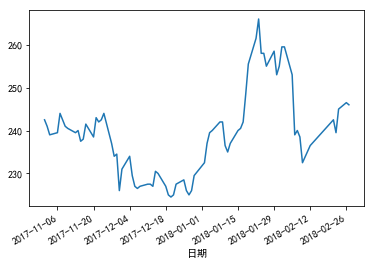

In [22]:
df_ml['收盤價'].plot()

In [23]:
df_ml

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,殖利率(%),本益比,股價淨值比
日期,,,,,,,,,,,
2017-11-01,20465054.0,4.975625e+09,243.5,245.0,241.5,242.5,-0.5,6464.0,2.89,17.92,4.69
2017-11-02,16309342.0,3.940182e+09,242.0,242.5,240.5,241.0,-1.5,5912.0,2.90,17.81,4.66
2017-11-03,18327682.0,4.386122e+09,240.5,241.0,238.5,239.0,-2.0,5621.0,2.93,17.66,4.62
2017-11-06,21029515.0,5.063671e+09,243.5,244.0,239.0,239.5,0.5,6601.0,2.92,17.70,4.63
2017-11-07,21689261.0,5.266500e+09,242.0,244.0,241.5,244.0,4.5,6729.0,2.87,18.03,4.72
2017-11-08,14579103.0,3.536455e+09,243.0,243.5,242.0,242.5,-1.5,4610.0,2.89,17.92,4.69
2017-11-09,21366949.0,5.151629e+09,240.5,243.0,240.0,241.0,-1.5,6339.0,2.90,17.81,4.66
2017-11-10,15061296.0,3.629827e+09,240.0,242.0,239.5,240.5,-0.5,4465.0,2.91,17.78,4.65
2017-11-13,12087858.0,2.904559e+09,240.0,241.5,239.5,239.5,-1.0,4288.0,2.92,17.70,4.63


## 機器學習預處理：製作明日收盤價(y)

In [24]:
date_list = list(df_ml.index)
for i in range(len(df_ml)-1):
    df_ml.loc[date_list[i],'明日收盤價'] = df_ml.loc[date_list[i+1], '收盤價']
df_ml

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,殖利率(%),本益比,股價淨值比,明日收盤價
日期,,,,,,,,,,,,
2017-11-01,20465054.0,4.975625e+09,243.5,245.0,241.5,242.5,-0.5,6464.0,2.89,17.92,4.69,241.0
2017-11-02,16309342.0,3.940182e+09,242.0,242.5,240.5,241.0,-1.5,5912.0,2.90,17.81,4.66,239.0
2017-11-03,18327682.0,4.386122e+09,240.5,241.0,238.5,239.0,-2.0,5621.0,2.93,17.66,4.62,239.5
2017-11-06,21029515.0,5.063671e+09,243.5,244.0,239.0,239.5,0.5,6601.0,2.92,17.70,4.63,244.0
2017-11-07,21689261.0,5.266500e+09,242.0,244.0,241.5,244.0,4.5,6729.0,2.87,18.03,4.72,242.5
2017-11-08,14579103.0,3.536455e+09,243.0,243.5,242.0,242.5,-1.5,4610.0,2.89,17.92,4.69,241.0
2017-11-09,21366949.0,5.151629e+09,240.5,243.0,240.0,241.0,-1.5,6339.0,2.90,17.81,4.66,240.5
2017-11-10,15061296.0,3.629827e+09,240.0,242.0,239.5,240.5,-0.5,4465.0,2.91,17.78,4.65,239.5
2017-11-13,12087858.0,2.904559e+09,240.0,241.5,239.5,239.5,-1.0,4288.0,2.92,17.70,4.63,240.0


## 監督式機器學習 - 線性迴歸

In [25]:
df_ml = df_ml.dropna()
X = df_ml[['開盤價','最高價','最低價','收盤價','漲跌價差','殖利率(%)','本益比','股價淨值比']]
y = df_ml[['明日收盤價']]

### 切分資料

In [26]:
X_train = X[:-1]
X_test = X[-1:]
y_train = y[:-1]
y_test = y[-1:]

In [27]:
X_test

,開盤價,最高價,最低價,收盤價,漲跌價差,殖利率(%),本益比,股價淨值比
日期,,,,,,,,
2018-02-26,247.0,247.5,245.0,246.5,1.5,3.25,18.63,4.2


In [28]:
y_test

,明日收盤價
日期,
2018-02-26,246.0


### 標準化

In [29]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 訓練

In [30]:
from sklearn import linear_model

# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [31]:
regr.score(X_train_std, y_train)

0.87883001665500171

In [32]:
regr.coef_

array([[-1.84605661,  8.52309846, -3.87595464, -1.08558971,  0.92345091,
        -8.64021887, -0.74336621, -0.35382849]])

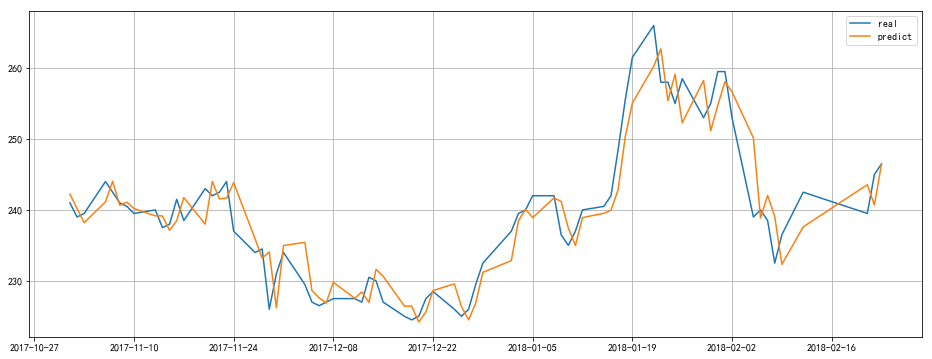

In [33]:
plt.figure(figsize=(16,6))
plt.plot(X_train.index, y_train.values, label='real')
plt.plot(X_train.index, regr.predict(X_train_std), label='predict')
plt.grid()
plt.legend()

### 預測單日收盤價

In [34]:
print('2018/2/26 收盤價')
print('實際值', y_test.values)
print('預測值', regr.predict(X_test_std))
print('誤差百分比 =', (regr.predict(X_test_std)[0][0] - y_test.values[0][0])/y_test.values[0][0] * 100, '%')

2018/2/26 收盤價
實際值 [[ 246.]]
預測值 [[ 216.70905816]]
誤差百分比 = -11.9068869257 %


## 製作明日漲跌價差

In [35]:
df_ml2 = df_ml.copy()
date_list = list(df_ml2.index)
for i in range(len(df_ml2)-1):
    df_ml2.loc[date_list[i],'明日漲跌價差'] = df_ml2.loc[date_list[i+1], '漲跌價差']
df_ml2

,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數,殖利率(%),本益比,股價淨值比,明日收盤價,明日漲跌價差
日期,,,,,,,,,,,,,
2017-11-01,20465054.0,4.975625e+09,243.5,245.0,241.5,242.5,-0.5,6464.0,2.89,17.92,4.69,241.0,-1.5
2017-11-02,16309342.0,3.940182e+09,242.0,242.5,240.5,241.0,-1.5,5912.0,2.90,17.81,4.66,239.0,-2.0
2017-11-03,18327682.0,4.386122e+09,240.5,241.0,238.5,239.0,-2.0,5621.0,2.93,17.66,4.62,239.5,0.5
2017-11-06,21029515.0,5.063671e+09,243.5,244.0,239.0,239.5,0.5,6601.0,2.92,17.70,4.63,244.0,4.5
2017-11-07,21689261.0,5.266500e+09,242.0,244.0,241.5,244.0,4.5,6729.0,2.87,18.03,4.72,242.5,-1.5
2017-11-08,14579103.0,3.536455e+09,243.0,243.5,242.0,242.5,-1.5,4610.0,2.89,17.92,4.69,241.0,-1.5
2017-11-09,21366949.0,5.151629e+09,240.5,243.0,240.0,241.0,-1.5,6339.0,2.90,17.81,4.66,240.5,-0.5
2017-11-10,15061296.0,3.629827e+09,240.0,242.0,239.5,240.5,-0.5,4465.0,2.91,17.78,4.65,239.5,-1.0
2017-11-13,12087858.0,2.904559e+09,240.0,241.5,239.5,239.5,-1.0,4288.0,2.92,17.70,4.63,240.0,0.5


In [36]:
df_ml2 = df_ml2.dropna()
X = df_ml2[['開盤價','最高價','最低價','收盤價','漲跌價差','殖利率(%)','本益比','股價淨值比']]
y = df_ml2[['明日漲跌價差']]

### 切分資料

In [37]:
X_train = X[:-1]
X_test = X[-1:]
y_train = y[:-1]
y_test = y[-1:]

### 標準化

In [38]:
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

### 訓練

In [39]:
# linear regression 物件
regr = linear_model.LinearRegression()

# 訓練模型
regr.fit(X_train_std, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [40]:
regr.score(X_train_std, y_train)

0.115246000986993

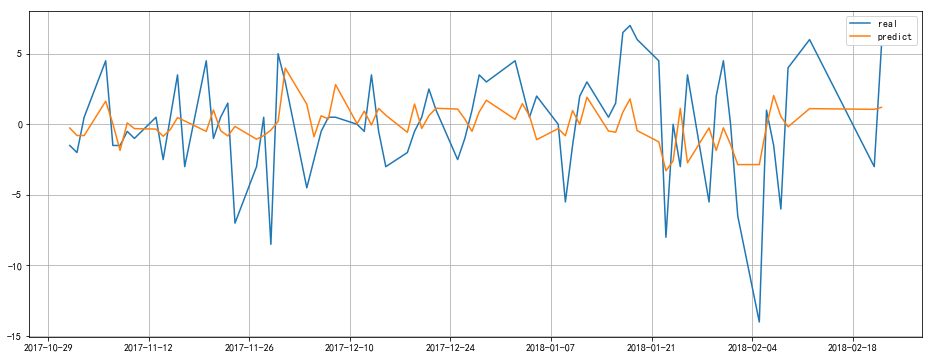

In [41]:
plt.rcParams['axes.unicode_minus'] = False #正常顯示負號
plt.figure(figsize=(16,6))
plt.plot(X_train.index, y_train.values,label='real')
plt.plot(X_train.index, regr.predict(X_train_std), label='predict')
plt.grid()
plt.legend()

### 預測單日漲跌價差

In [42]:
print('2018/2/26 漲跌價差')
print('實際值', y_test.values)
print('預測值', regr.predict(X_test_std))
print('誤差百分比 =', (regr.predict(X_test_std)[0][0] - y_test.values[0][0])/y_test.values[0][0] * 100, '%')

2018/2/26 漲跌價差
實際值 [[ 1.5]]
預測值 [[ 1.52422182]]
誤差百分比 = 1.61478833233 %


##  加入新聞/社群等文字資料
### e.g. PTT股市社群資料：https://www.kaggle.com/randyrose2017/pttstock/data

In [43]:
import pandas as pd
df = pd.read_csv('daychat_push_60d_1006.csv', encoding='utf-8') # Kaggle dataset encoding 使用 utf-8
df.head(20)

,Unnamed: 0,ID,content,time,type
0,0,steward135,: 崩崩,07/17 08:32\n,推
1,1,wingboys,: 台指期搓好假,07/17 08:33\n,推
2,2,f204137,: iwant在哪兒 出來我看看,07/17 08:33\n,推
3,3,maimss,: sf早大家早,07/17 08:33\n,推
4,4,HenryLin123,: 看棒球啦,07/17 08:34\n,推
5,5,wtfbt,: 山山,07/17 08:35\n,→
6,6,wingboys,: GG跟鴻海都要填了嗎？,07/17 08:36\n,推
7,7,BB855036,: 2891今日填息?,07/17 08:36\n,推
8,8,std410301,: 今天會嗨!!!,07/17 08:36\n,推
9,9,std410301,: 認證 一定很狂,07/17 08:36\n,→


## It's your turn...
#### Follow-ups: 增加特徵、新聞/文字資料、技術指標、數據筆數、長期測試建好的模型...
#### Notice: 因為特徵彼此具相關性，若發生過適 (overfitting)問題，可改用正規化過的線性迴歸，如：脊迴歸 (Ridge Regression)
#### 補充：預測股市這類具時間性的數據 (明日數據受過往數據影響，不單單受昨日影響)，可嘗試使用深度學習之遞迴神經網路(RNNs)架構